In [23]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read file
df = pd.read_csv("./data/DataKindScrubbedandwithoutEmailSurvey.csv") 

## Clean Leave/Stay Tech Column

In [24]:
# Rename column
df = df.rename(columns = {"In the previous questions you told us you are currently in a technical role in which you use  design, science, engineering, or math on a daily basis. Which of the following applies to your current role :": "leaving_or_staying"})

# Recategorize leaving_or_staying
df["leaving_or_staying"].fillna("Exited role", inplace = True) #exited tech role
df["leaving_or_staying"] = pd.Series(df["leaving_or_staying"]).str.replace("A year from now, I plan to stay in this role", "Plan to stay in role") #stay in tech role
df["leaving_or_staying"] = pd.Series(df["leaving_or_staying"]).str.replace("I plan to exit this role in 12 months or less", "Plan to exit role") #exit tech role
df["leaving_or_staying"] = pd.Series(df["leaving_or_staying"]).str.replace("I plan to exit technology in 12 months or less", "Plan to exit industry") #exit tech industry

## Gender

/var/folders/n7/823csjyj4z7cl_bvggs_86g40000gn/T/ipykernel_48188/908698398.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig1.set_yticklabels(fig1.get_yticks(), size = 12) #yticklabels
/var/folders/n7/823csjyj4z7cl_bvggs_86g40000gn/T/ipykernel_48188/908698398.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig1.set_xticklabels(dfg["leaving_or_staying"], size = 12) #xticklabels
/var/folders/n7/823csjyj4z7cl_bvggs_86g40000gn/T/ipykernel_48188/908698398.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


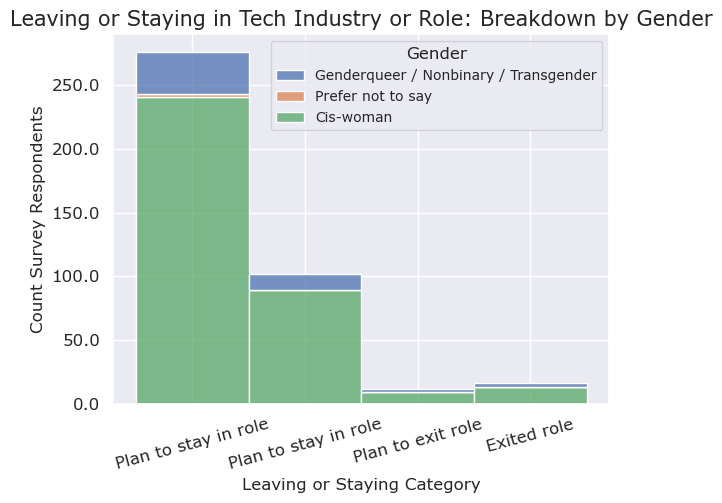

In [33]:
# Recategorize gender
df = df.rename(columns={df.columns[2]: 'gender'}) 
df.loc[df.iloc[:,2].str.contains('Nonbinary'), 'gender'] = 'Genderqueer / Nonbinary / Transgender' #nonbinary
df.loc[df.iloc[:,2].str.contains('Transgender'), 'gender'] = 'Genderqueer / Nonbinary / Transgender' #transgender
df.loc[df.iloc[:,2].str.contains('Woman'), 'gender'] = 'Cis-woman' #woman
df.loc[df.iloc[:,2].str.contains('Prefer'), 'gender'] = 'Prefer not to say' #prefer not to say

# Create new df containing leaving_or_staying and gender
dfg = pd.DataFrame(df["leaving_or_staying"])
dfg["gender"] = df["gender"]

# Create new column filled with 1s
dfg["count"] = 1

# Pivot with sum of each occurrence
dfg.pivot_table(index='leaving_or_staying', columns='gender', values='count', aggfunc='sum')

# Seaborn settings
sns.set_palette("pastel") #palette
sns.set(font="Verdana") #font
plt.xticks(rotation=15) #rotate labels

# Plot bar chart
fig1 = sns.histplot(binwidth=1, x="leaving_or_staying", hue="gender", data=dfg, stat="count", multiple="stack", legend=True) #plot
fig1.legend(handles=fig1.legend_.legendHandles, labels=[t.get_text() for t in fig1.legend_.texts],
            title="Gender", 
            loc='upper right',
            fontsize = 10) #legend
fig1.set_title('Leaving or Staying in Tech Industry or Role: Breakdown by Gender', fontsize = 15) #title
fig1.set_xlabel('Leaving or Staying Category', fontsize = 12) #xlabel
fig1.set_ylabel('Count Survey Respondents', fontsize = 12) #yabel
fig1.set_yticklabels(fig1.get_yticks(), size = 12) #yticklabels
fig1.set_xticklabels(dfg["leaving_or_staying"], size = 12) #xticklabels
sns.set(font_scale = 2)

# Save plot
fig1 = fig1.get_figure()
fig1.show()
fig1.savefig("./plots/breakdown_by_gender.png", dpi = 200, bbox_inches = "tight") 


## Race/ethnicity

['Hispanic or Latino' 'White or Caucasian' 'Black or African American'
 'Prefer not to reply' 'Multiracial or Biracial'
 'Asian or Pacific Islander' 'White, but I am an immigrant'
 'Slavic (Polish)' 'Native American or Alaskan Native' 'Middle Eastern'
 'north african']


/var/folders/n7/823csjyj4z7cl_bvggs_86g40000gn/T/ipykernel_48188/2408726810.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig2.set_yticklabels(fig2.get_yticks(), size = 12) #yticklabels
/var/folders/n7/823csjyj4z7cl_bvggs_86g40000gn/T/ipykernel_48188/2408726810.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig2.set_xticklabels(dfr["leaving_or_staying"], size = 12) #xticklabels
/var/folders/n7/823csjyj4z7cl_bvggs_86g40000gn/T/ipykernel_48188/2408726810.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


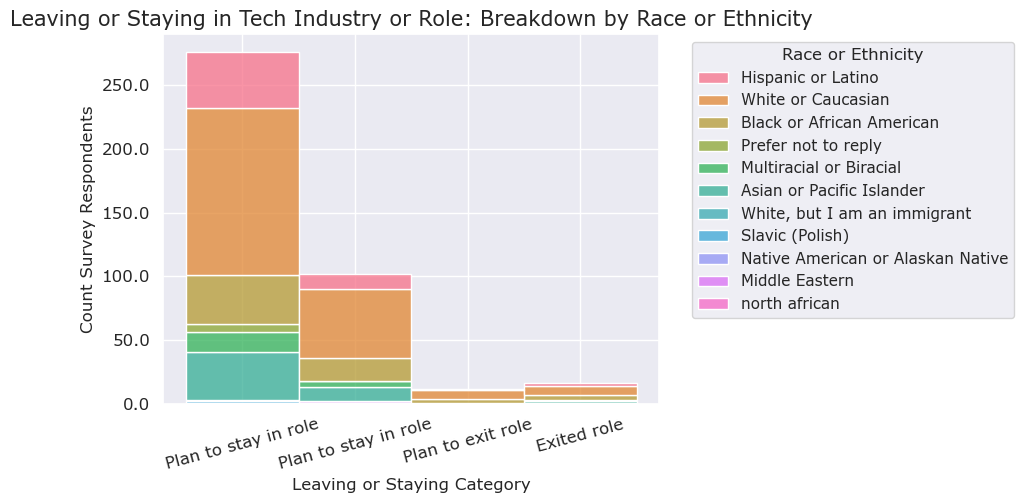

In [26]:
# Rename race/ethnicity column
df = df.rename(columns={df.columns[3]: 'race_ethnicity'}) 

# Rename some categories for consistency
print(df['race_ethnicity'].unique())

# Create new df containing leaving_or_staying and race/ethnicity
dfr = pd.DataFrame(df["leaving_or_staying"])
dfr["race_ethnicity"] = df["race_ethnicity"]

# Create new column filled with 1s
dfr["count"] = 1

# Pivot with sum of count of each occurrence
pivot = dfr.pivot_table(index='leaving_or_staying', columns='race_ethnicity', values='count', aggfunc='sum')

# Seaborn settings
sns.set_palette("Set2") #palette
sns.set(font="Verdana") #font
plt.xticks(rotation=15) #rotate labels

# Plot bar chart
fig2 = sns.histplot(binwidth=1, x="leaving_or_staying", hue="race_ethnicity", data=dfr, stat="count", multiple="stack", legend=True) #plot
fig2.legend(handles=fig2.legend_.legendHandles, labels=[t.get_text() for t in fig2.legend_.texts],
            title="Race or Ethnicity",
            bbox_to_anchor=(1.05, 1), loc='upper left') #legend
fig2.set_title('Leaving or Staying in Tech Industry or Role: Breakdown by Race or Ethnicity', fontsize = 15) #title
fig2.set_xlabel('Leaving or Staying Category', fontsize = 12) #xlabel
fig2.set_ylabel('Count Survey Respondents', fontsize = 12) #yabel
fig2.set_yticklabels(fig2.get_yticks(), size = 12) #yticklabels
fig2.set_xticklabels(dfr["leaving_or_staying"], size = 12) #xticklabels
sns.set(font_scale = 2)


# Save plot
fig2 = fig2.get_figure()
fig2.show()
fig2.savefig("./plots/breakdown_by_race.png", dpi = 200, bbox_inches = "tight") 